# Predicting the class of flower based on available attributes

In [1]:
#import libraries
from sklearn.datasets import load_iris
import numpy as np

In [2]:
#info about iris dataset
iris_dataset = load_iris()
print("target name: {}".format(iris_dataset['target_names']))
print("target name: {}".format(iris_dataset['feature_names']))
print("target name: {}".format(type(iris_dataset['data'])))

target name: ['setosa' 'versicolor' 'virginica']
target name: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target name: <class 'numpy.ndarray'>


In [3]:
#shape of data
print("shape of iris dataset: {}".format(iris_dataset['data'].shape))

shape of iris dataset: (150, 4)


In [4]:
print("Target: {}".format(iris_dataset['target']))

Target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
#resaving dataset as pandas dataframe
import pandas as pd
df = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
#adding the target class
df['class'] = iris_dataset['target']

In [9]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
#mixing up the target class
iris_data = df.sample(frac=1).reset_index(drop=True)
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,7.4,2.8,6.1,1.9,2
1,4.7,3.2,1.3,0.2,0
2,6.7,3.3,5.7,2.1,2
3,6.7,3.1,5.6,2.4,2
4,6.5,3.0,5.2,2.0,2
5,6.3,2.5,5.0,1.9,2
6,5.1,3.4,1.5,0.2,0
7,5.6,2.7,4.2,1.3,1
8,5.9,3.2,4.8,1.8,1
9,5.7,3.0,4.2,1.2,1


In [11]:
#using seaborn to plot all data fields
import seaborn as sns

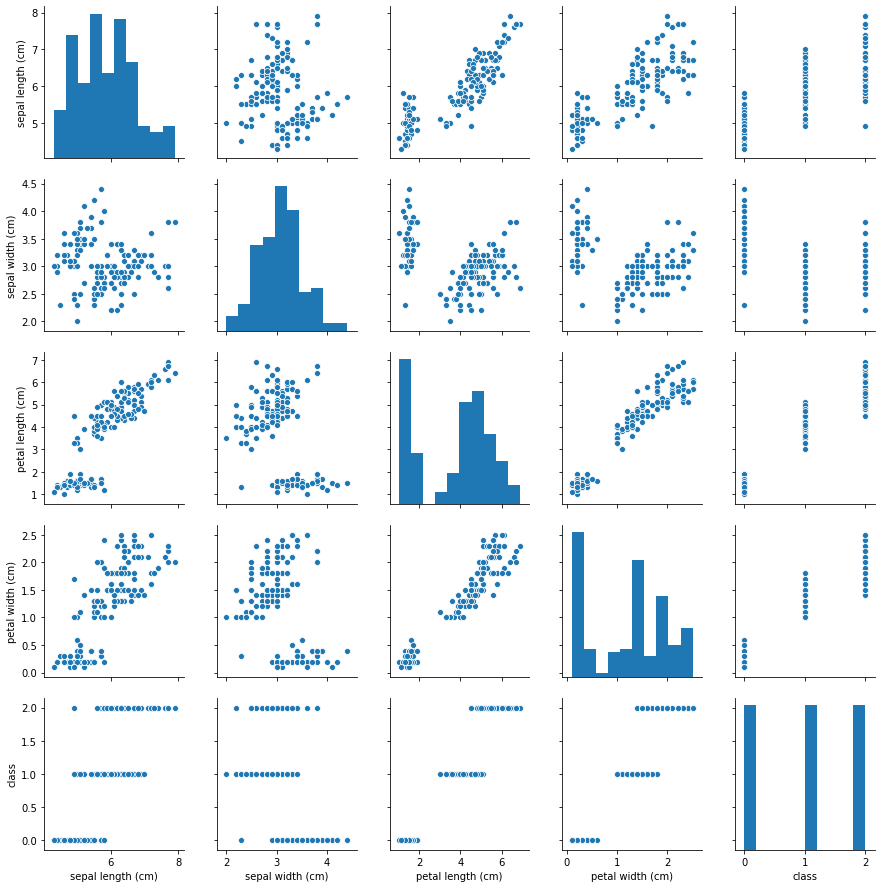

In [12]:
sns.pairplot(iris_data)

In [14]:
#splitting dataset into train and test sets
from sklearn.model_selection import train_test_split
X = iris_data.drop("class", 1)
y = iris_data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
#grid searching key hyperparameters for KNeighborsClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 25, 1)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=5, random_state=1)

grid_search = GridSearchCV(estimator=model, 
                           param_grid=grid, 
                           cv=cv, 
                           scoring='accuracy',
                           error_score=0)

grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']

stds = grid_result.cv_results_['std_test_score']

params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.980357 using {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
0.957143 (0.071344) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.957143 (0.071344) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.946429 (0.086381) with: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.957143 (0.071344) with: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.957143 (0.079361) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.957143 (0.079361) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.950000 (0.070565) with: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.964286 (0.069160) with: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.957143 (0.076866) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.955357 (0.077140) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.964286

c:\users\ek\gis\venv\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [17]:
#model evaluation
knn = grid_result.best_estimator_
knn.score(X_train, y_train)

0.9732142857142857

In [18]:
knn.score(X_test, y_test)

0.8947368421052632

In [23]:
flower = knn.predict([[2.3,4.5,5.6,3.9]])
print("Setosa" if flower[0]==0 else "Versicolor" if flower[0]==1 else "Virginica")

Virginica


In [25]:
#save and load model
import joblib
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']

In [26]:
model = joblib.load('knn_model.pkl')

In [30]:
print("Setosa" if model.predict([[1.2,2.2,3.2,4.2]])[0]==0 else "Versicolor" if model.predict([[1.2,2.2,3.2,4.2]])[0]==1 else "Virginica")

Versicolor
